# Find some relationship between Argentina cases with weather 

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('seaborn-whitegrid')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

## 1 Weather

In [2]:
weather = pd.read_csv('../weatherdataset.csv')

# Convert our report_date columns to datetime datatype
weather['date_time'] = pd.to_datetime(weather['date_time'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date_time']).year
weather['month'] = pd.DatetimeIndex(weather['date_time']).month

# Argentina
argentina_weather = weather[weather['location'] == 'Argentina']
argentina_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
0,2016-03-19,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,9,17,18,17,36,10,58,0.0,1023,22,10,125,27,Argentina,2016,3
1,2016-03-20,22,16,0.0,11.6,5,80,05:38 PM,04:15 AM,06:58 AM,07:05 PM,10,19,19,19,29,22,58,0.1,1022,22,10,95,21,Argentina,2016,3
2,2016-03-21,24,17,0.0,10.3,5,87,06:11 PM,05:10 AM,06:59 AM,07:04 PM,14,20,21,20,20,58,69,3.4,1017,24,10,95,15,Argentina,2016,3
3,2016-03-22,28,19,0.0,11.6,6,94,06:44 PM,06:05 AM,07:00 AM,07:02 PM,16,24,24,23,11,2,65,0.0,1016,28,10,117,8,Argentina,2016,3
4,2016-03-23,30,17,0.0,11.6,6,100,07:16 PM,06:59 AM,07:01 AM,07:01 PM,14,24,24,23,19,2,60,0.0,1015,30,10,139,14,Argentina,2016,3


In [3]:
argentina_weather = argentina_weather[['date_time','maxtempC','precipMM','humidity']]
argentina_weather

,date_time,maxtempC,precipMM,humidity
0,2016-03-19,22,0.0,58
1,2016-03-20,22,0.1,58
2,2016-03-21,24,3.4,69
3,2016-03-22,28,0.0,65
4,2016-03-23,30,0.0,60
...,...,...,...,...
453,2017-06-15,17,0.5,93
454,2017-06-16,23,1.3,89
455,2017-06-17,22,5.3,72
456,2017-06-18,11,0.0,54


## 2 Zika virus

In [4]:
zika = pd.read_csv('../zikavirus_dataset.csv')
zika.head()

,report_date,location,location_type,data_field,cases
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2.0


In [5]:
zika = zika.dropna(how = 'all')
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)
zika['cases'] = zika['cases'].astype(float)
zika['cases'] = zika['cases'].fillna(0)
zika['cases'] = zika['cases'].astype(int)
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")
zika['year'] = pd.DatetimeIndex(zika['report_date']).year
zika['month'] = pd.DatetimeIndex(zika['report_date']).month

In [6]:
zika.head()

,report_date,location,location_type,data_field,cases,year,month
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1,2017.0,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2,2017.0,1.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2,2017.0,1.0


## 1.1 Argentina

In [7]:
argentina_zika = zika[zika["location"].str.startswith("Argentina")]
argLocal = argentina_zika[argentina_zika['data_field'] == 'cumulative_confirmed_local_cases']
argentina_monthly = argLocal.groupby(['report_date']).cases.agg([sum])
argentina_monthly = argentina_monthly.reset_index()
argentina_monthly = argentina_monthly.rename(columns={"report_date": "date_time"})
argentina_monthly.head()

,date_time,sum
0,2016-03-28,1
1,2016-04-02,1
2,2016-04-08,1
3,2016-04-16,1
4,2016-04-22,1


In [8]:
weather_case = pd.merge(argentina_monthly,argentina_weather, on=['date_time'], how='left') 
weather_case.head()

,date_time,sum,maxtempC,precipMM,humidity
0,2016-03-28,1,29,0.1,68
1,2016-04-02,1,23,79.3,89
2,2016-04-08,1,22,1.9,84
3,2016-04-16,1,22,0.0,70
4,2016-04-22,1,21,0.0,63


Text(0.5, 1.0, 'Humidity')

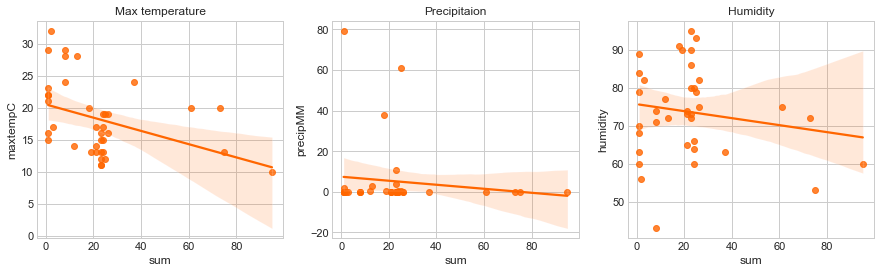

In [11]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=weather_case['maxtempC'], x=weather_case['sum'],color='#FF6600')
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=weather_case['precipMM'], x=weather_case['sum'],color='#FF6600')
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=weather_case['humidity'], x=weather_case['sum'],color='#FF6600')
axes[2].set_title('Humidity')

<AxesSubplot:>

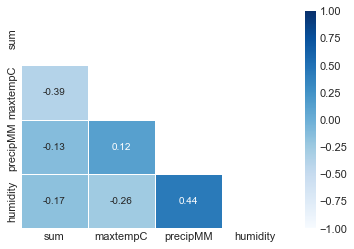

In [15]:
matrix = np.triu(weather_case.corr())
sns.heatmap(weather_case.corr(),annot=True,vmax=1,vmin=-1, mask=matrix, linewidths=.5 , cmap='Blues')
